This tutorial provides an introduction to basic image processing techniques using the OpenCV computer vision library and some standard data analysis libraries in Python.
A good introduction about Google Colab can be find [here](https://colab.research.google.com/notebooks/welcome.ipynb) 
OpenCV is released under a BSD license and hence it’s free for both academic and commercial use. A good introduction about OpenCV library can be find [here](https://opencv.org)

**Load some required dependencies**


*   Numpy is an array manipulation library, used for linear algebra and random number capabilities
*   Pandas is a library for data manipulation and data analysis.
*   CV2 is a library for computer vision tasks.
*   Skimage is a library which supports image processing applications on python.
*   Matplotlib is a library which generates figures and provides graphical user interface toolkit.


In [2]:
!unzip Data.zip

Archive:  Data.zip
warning [Data.zip]:  2208581 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  2208581
  (attempting to re-compensate)
replace Data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Data/.DS_Store          
replace __MACOSX/Data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/Data/._.DS_Store  
replace Data/455x520.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Data/455x520.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/455x520.png        
  inflating: __MACOSX/Data/._455x520.png  
  inflating: Data/bgr.png            
  inflating: __MACOSX/Data/._bgr.png  
  inflating: Data/book_cover.jpg     
  inflating: __MACOSX/Data/._book_cover.jpg  
  inflating: Data/book_cover_rotated.jpg  
  inflating: __MACOSX/Data/._book_cover_rotated.jpg  
  inflating: Data/cat.jpg            
  inflating: __MACOSX/Data/.

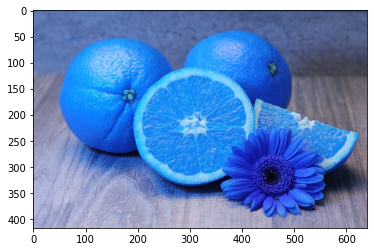

In [4]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./Data/orange.jpg')
plt.imshow(img)

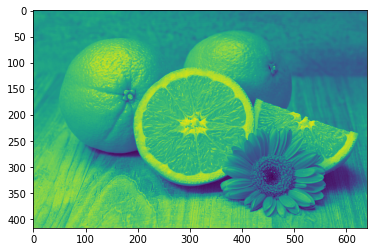

In [10]:
import cv2
import matplotlib.pyplot as plt
default_img = cv2.imread('./Data/orange.jpg')
#img = cv2.cvtColor(default_img, cv2.COLOR_BGR2RGB) # To RGB
img = cv2.cvtColor(default_img, cv2.COLOR_BGR2GRAY) # Grayscale
plt.imshow(img)

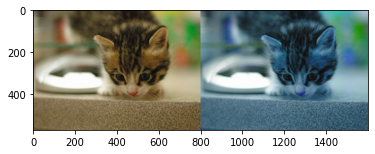

In [16]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

url = "https://placekitten.com/800/571"
img1 = io.imread(url)
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_final = cv2.hconcat((img1, img2))
plt.imshow(img_final)

In [18]:
# Check the image matrix data type
print(img_final.dtype)
# Check the height of image 
print(img_final.shape[0])
# Check the width of image 
print(img_final.shape[1])
# Check the number of channels of the image
print(img_final.shape[2])

uint8
571
1600
3


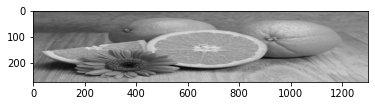

In [22]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Along central x axis
new_img = cv2.flip(img_rgb,0)
plt.imshow(new_img)

# Along central y axis
new_img = cv2.flip(img_rgb,1)
plt.imshow(new_img)

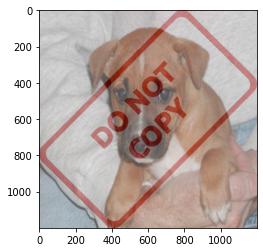

In [23]:
# Two images
img1 = cv2.imread('./Data/dog.jpg')
img2 = cv2.imread('./Data/watermark_no_copy.png')
# Check image shape should be same
img1.shape
img2.shape
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
##Let's practice resizing the image, since the DO NOT COPY image is actually quite large 1200 by 1200, and our puppy in backpack image is 1400 by 1000
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))
blended = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)
plt.imshow(blended)

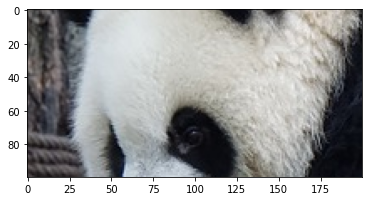

In [24]:
img1 = cv2.imread('./Data/panda.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
img1.shape
x_offset=150
y_offset=150
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:250,x_offset:350] # BOTTOM RIGHT CORNER
plt.imshow(roi)

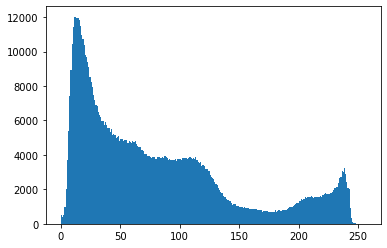

In [25]:
# Trace a histogram with matplotlib
# Number of pixels per values
# This shows that a lot of pixels has a value between 0 and 50.
# ravel() allow to flatten the array (contiguous C-like array)
# It allows to find similar pictures
plt.hist(img1.ravel(),bins = 256, range = [0,256]) 
plt.show()

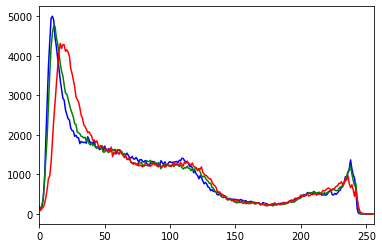

In [28]:
# Separate the image by channel
# Draw one histogram for each channel (red, green, blue)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [39]:
# Find and draw image contours
img = cv2.imread('./Data/watermelon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,150,255,0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# Draw External Contours

# Set up empty array
external_contours = np.zeros(image.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours,cmap='gray')

ValueError: ignored

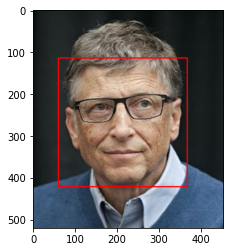

In [35]:
# Face detection
import numpy as np
import cv2 


import matplotlib.pyplot as plt
img = cv2.imread('./Data/455x520.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
##OpenCV comes with these pre-trained cascade files
# load face cascade and eye cascade
#face_cascade = cv2.CascadeClassifier('./Data/haarcascades/haarcascade_frontalface_default.xml')

face_cascade = cv2.CascadeClassifier('./Data/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(img)

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

**Reading, Writing and Displaying Images**

An image can be represented as a multidimensional array. This is because a machine can represent everything as numbers and in python, numpy can be used to represent it.

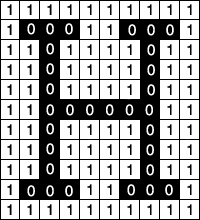

In the case of color images, we have three colored channels. Hence colored images will have multiple values for single-pixel values. Depending on the resolution and color depth, those arrays can vary in size. The color values go from 0 to 255. These color channels are generally represented as Red Green Blue (RGB) for instance.

In [ ]:
!unzip Data.zip

Archive:  Data.zip
replace Data/cat.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/cat.jpg            
  inflating: __MACOSX/Data/._cat.jpg  
  inflating: Data/dog.jpg            
  inflating: __MACOSX/Data/._dog.jpg  
  inflating: Data/orange.jpg         
  inflating: __MACOSX/Data/._orange.jpg  
  inflating: Data/panda.jpg          
  inflating: __MACOSX/Data/._panda.jpg  
  inflating: Data/plane.jpg          
  inflating: __MACOSX/Data/._plane.jpg  
  inflating: Data/pumpkins.jpg       
  inflating: __MACOSX/Data/._pumpkins.jpg  
  inflating: Data/pumpkins_output.jpg  
  inflating: __MACOSX/Data/._pumpkins_output.jpg  
  inflating: Data/tomato.jpg         
  inflating: __MACOSX/Data/._tomato.jpg  
  inflating: Data/watermark_no_copy.png  
  inflating: __MACOSX/Data/._watermark_no_copy.png  
  inflating: Data/watermelon.jpg     
  inflating: __MACOSX/Data/._watermelon.jpg  


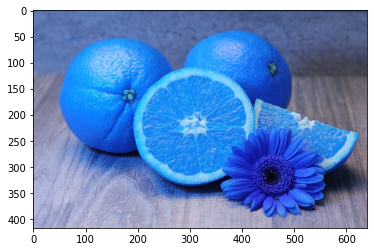

In [ ]:
import cv2
img = cv2.imread('./Data/orange.jpg')
plt.imshow(img)

By default, the imread function reads images in the BGR (Blue-Green-Red) format. We can read images in different formats using extra flags in the imread function:

*   cv2.IMREAD_COLOR: Default flag for loading a color image.
*   cv2.IMREAD_GRAYSCALE: Loads images in grayscale format.



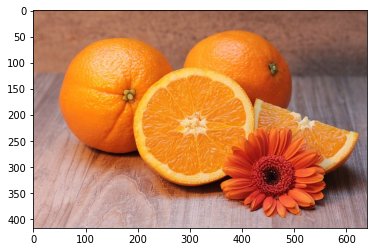

In [ ]:
import cv2
image = cv2.imread("./Data/orange.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

We can also read images from urls, and display them.

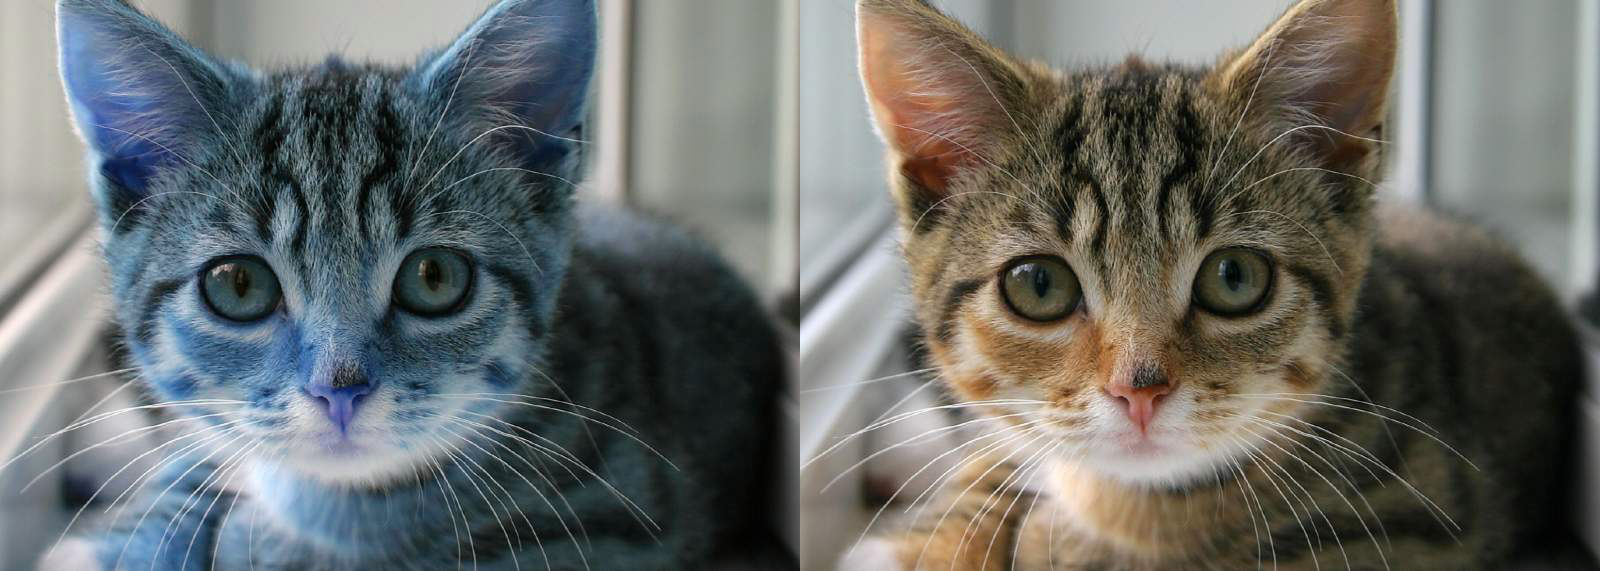

In [ ]:
# Create a list to store the urls of the images
url = "https://placekitten.com/800/571"
# Read and display the image
image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image, image_2))
cv2_imshow(final_frame)
print('\n')

In [ ]:
# Check the image matrix data type
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

Resizing Images: Resizing is really helpful in training deep learning models. However different interpolation and downsampling functions also fall under the umbrella of OpenCV with the following parameters
*   INTER_LINEAR
*   INTER_AREA
*   INTER_CUBIC
*   INTER_LANCZOS4

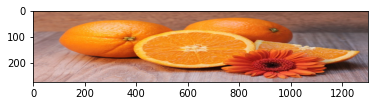

In [ ]:
import cv2
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img =cv2.resize(img,(1300,275))
plt.imshow(img)

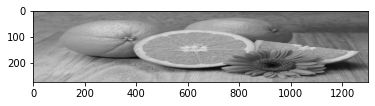

In [19]:
import cv2
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(1300,275))
plt.imshow(img)

Image Rotation/Flipping: 

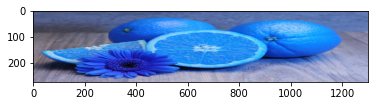

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Along central x axis
new_img = cv2.flip(img_rgb,0)
plt.imshow(new_img)

# Along central y axis
new_img = cv2.flip(img_rgb,1)
plt.imshow(new_img)

Blending Images: we can add or blend two images with the help of the cv2.addWeighted() method. addWeighted() function returns numpy array containing pixel values of the resulting image.
Blending is nothing but the addition of two image matrix. So if we want to add two images then that means very simple we have to add respective two matrices. For aggregating two matrices, the size of the two images should be the same.

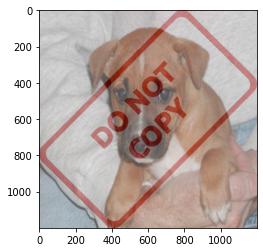

In [ ]:
# Two images
img1 = cv2.imread('./Data/dog.jpg')
img2 = cv2.imread('./Data/watermark_no_copy.png')
# Check image shape should be same
img1.shape
img2.shape
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
##Let's practice resizing the image, since the DO NOT COPY image is actually quite large 1200 by 1200, and our puppy in backpack image is 1400 by 1000
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))
blended = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)
plt.imshow(blended)

Creating a Region of Interest ROI: The basic idea behind ROI is that it maps the position of every object in the image to a new location in the final output image. ROI adds shift-invariance to the model also. By changing the object position model can learn patterns better which leads to the generalizability of the model.ROI can be extensively used in the image preprocessing stage.



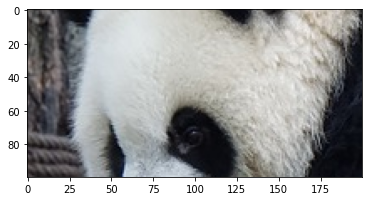

In [ ]:
img1 = cv2.imread('./Data/panda.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
img1.shape
x_offset=150
y_offset=150
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:250,x_offset:350] # BOTTOM RIGHT CORNER
plt.imshow(roi)

Image Contours and Histograms:  A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab hist() function. Display the histogram of R, G, B channel We could observe that the green channel has many pixels in 255, which represents the white patch in the image.

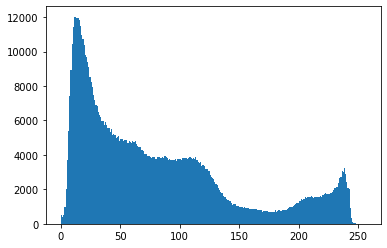

In [ ]:
plt.hist(img1.ravel(),bins = 256, range = [0,256]) 
plt.show()

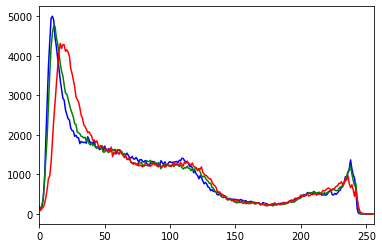

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

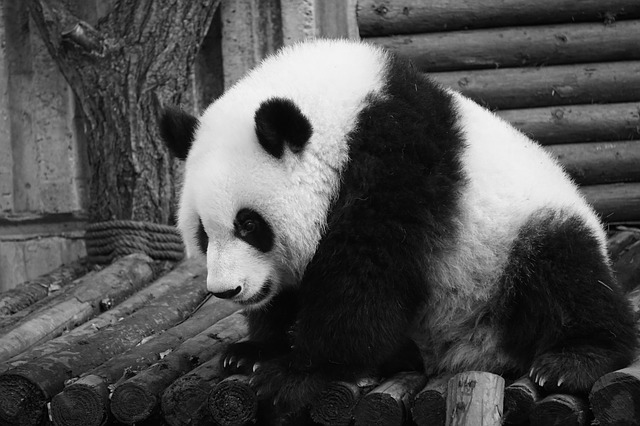

In [ ]:
gray_image = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

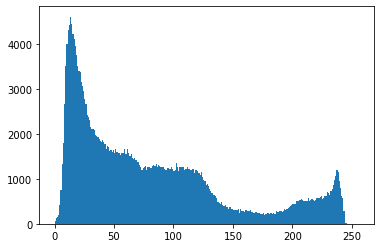

In [ ]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

Find image contour of the grayscale image

In [ ]:
'''
img = cv2.imread('./Data/watermelon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(gray,150,255,0)
image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# Draw External Contours

# Set up empty array
external_contours = np.zeros(image.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours,cmap='gray')
'''

Face Detection: Face detection module is available in OpenCV by using a haar cascade based object detection algorithm. Haar cascades are basically trained machine learning classifiers model that calculates different features like lines, contours, edges, etc.
These Trained ML models that detect face, eyes, etc are open-sourced at OpenCV repos on GitHub. Also, we can also train your own haar cascade for any object.

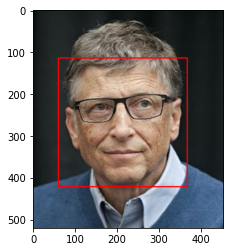

In [ ]:
import numpy as np
import cv2 


import matplotlib.pyplot as plt
img = cv2.imread('./Data/455x520.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
##OpenCV comes with these pre-trained cascade files
# load face cascade and eye cascade
#face_cascade = cv2.CascadeClassifier('./Data/haarcascades/haarcascade_frontalface_default.xml')

face_cascade = cv2.CascadeClassifier('./Data/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(img)

